<a href="https://colab.research.google.com/github/akash-agarwal96/Simple-Linear-Regression/blob/master/Simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear Regression Model

###Loading the Data and Importing Libraries


In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


###Remove the index column

In [6]:
df.columns


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [0]:
df.drop(['Unnamed: 0'], axis =1, inplace = True)

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


##Exploratory Data Analysis

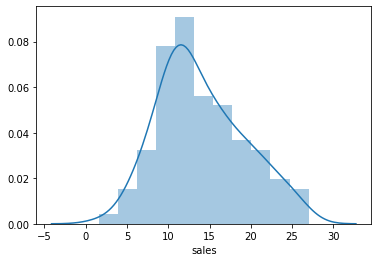

In [10]:
import seaborn as sns
sns.distplot(df.sales)

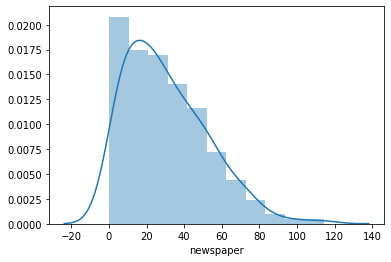

In [12]:
sns.distplot(df.newspaper)

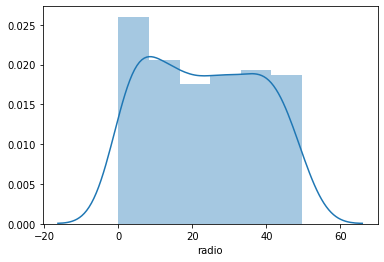

In [13]:
sns.distplot(df.radio)

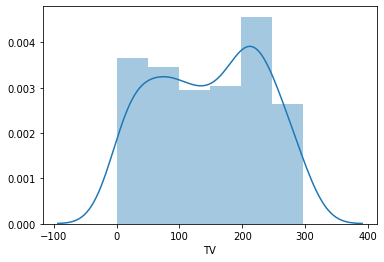

In [14]:
sns.distplot(df.TV)

##Exploring Relationships between Predictors and Response

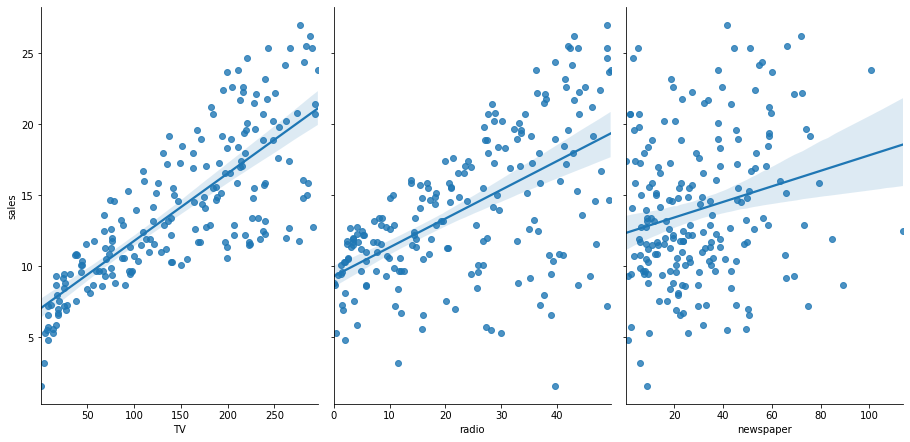

In [22]:
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', height=6,aspect=0.7, kind='reg')

In [23]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


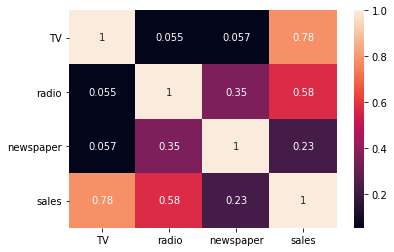

In [24]:
sns.heatmap(df.corr(), annot=True)

##Creating the Simple Linear Regression Model

In [25]:
X = df[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [27]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [28]:
y = df.sales
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [0]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

In [33]:
print('Training Set:' , X_train.shape , y_train.shape)
print('Test Set:' , X_test.shape, y_test.shape)

Training Set: (180, 1) (180,)
Test Set: (20, 1) (20,)


In [34]:
from sklearn.linear_model import  LinearRegression

linreg = LinearRegression()
linreg.fit(X_train , y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
print(linreg.intercept_)
print(linreg.coef_)

6.859309222769891
[0.04875033]


###Model Prediction with our model

In [36]:
y_pred = linreg.predict(X_test)
y_pred[:5]

array([17.13587918, 16.73125143, 11.52471598, 20.51915221, 19.23214345])

###Model Evaluation Metrics

In [47]:
#Mean Absolute Error
from sklearn import metrics
print("Mean Absolute Error: %.3f" % metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 2.548


In [48]:
#Mean Squared Error
print("Mean Squared Error: %.3f" % metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 12.026


In [49]:
#Root Mean Squared Error
print("Root Mean Squared Error: %.3f" %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 3.468


###Plot Outputs

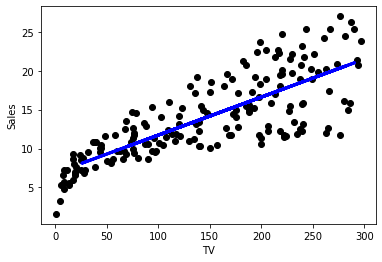

In [69]:
plt.scatter(X_train, y_train,  color='black' ,label="sales")
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.ylabel('Sales')
plt.xlabel('TV')

plt.show()

In [0]:
##The Model shows that increase in expense on Tv is increasing the Sales